En este ejercicio extraeremos datos relacionados con la industria musical desde DBpedia. Con los datos crearemos una red de colaboradores.

Code by Francisca Varela, [Eduardo Graells-Garrido](http://carnby.github.io) and Diego Caro.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster', style='white', palette='plasma')

In [7]:
from itertools import islice

# Primer paso: descargar los datos

This notebook downloads the necessary data to start working :) We use the [DBpedia 2016-10dataset](http://wiki.dbpedia.org/downloads-2016-04). Descarga estos dos archivos y ponlos dentro del directorio ``dbpedia_data``:
- http://downloads.dbpedia.org/2016-04/core-i18n/en/infobox_properties_en.ttl.bz2
- http://downloads.dbpedia.org/2016-04/core-i18n/en/instance_types_en.ttl.bz2


In [4]:
!mkdir dbpedia_data
!mkdir results

!cd dbpedia_data; wget -c http://downloads.dbpedia.org/2016-04/core-i18n/en/infobox_properties_en.ttl.bz2
!cd dbpedia_data; wget -c http://downloads.dbpedia.org/2016-04/core-i18n/en/instance_types_en.ttl.bz2

mkdir: dbpedia_data: File exists
mkdir: results: File exists
--2017-10-04 17:06:53--  http://downloads.dbpedia.org/2016-04/core-i18n/en/infobox_properties_en.ttl.bz2
Resolving downloads.dbpedia.org... 139.18.16.66
Connecting to downloads.dbpedia.org|139.18.16.66|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2017-10-04 17:06:54--  http://downloads.dbpedia.org/2016-04/core-i18n/en/instance_types_en.ttl.bz2
Resolving downloads.dbpedia.org... 139.18.16.66
Connecting to downloads.dbpedia.org|139.18.16.66|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



# Segundo paso: leer el 

[DBpedia](http://dbpedia.org/) es una base de datos que contiene la información estructurada de Wikipedia. 
La información está disponible como [datos enlazados](https://en.wikipedia.org/wiki/Linked_data). 

En DBpedia, cada artículo de Wikipedia es representado como una instancia. Una instancia es un concepto, que también puede estar relacionado con otro concepto. Para entender mejor la idea, veamos el archivo que contiene el tipo de instancia relacionada con cada artículo de Wikipedia:

In [5]:
!bzcat ./dbpedia_data/instance_types_en.ttl.bz2 |head -n 5

# started 2016-06-16T01:23:53Z
<http://dbpedia.org/resource/Achilles> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Thing> .
<http://dbpedia.org/resource/An_American_in_Paris> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://www.w3.org/2002/07/owl#Thing> .
<http://dbpedia.org/resource/Actrius> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Film> .
<http://dbpedia.org/resource/Animalia_(book)> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Book> .

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./dbpedia_data/instance_types_en.ttl.bz2, output file = (stdout)


Cada línea del archivo contiene tres componentes. Cada componente representa una relación entre dos instancias. En este caso, la primera componente representa un artículo de Wikipedia, la segunda representa una relación de **tipo** y la tercera componente representa el tipo de cada artículo. Por ejemplo, el artículo de Alabama es de tipo ``AdministrativeRegion``.

Con el módulo ``dbpedia_utils`` podemos leer el archivo sin almacenarlo en memoria:

La función `iter_entities_from` de `dbpedia_utils`. Esta función ayuda a iterar sobre las diferentes entidades de un archivo en DBPedia. Dependiendo del archivo, cada entidad tiene distintos atributos. Hay que hacer distintas exploraciones hasta encontrar la información que es útil para ti. La única constante es la URI de DBPedia en  cada entidad es el atributo 'resource.

In [6]:
from dbpedia_utils import iter_entities_from

In [7]:
entities = []
for e in islice(iter_entities_from('./dbpedia_data/instance_types_en.ttl.bz2', use_list=True), 5):
    entities.append(e)
entities

reading ./dbpedia_data/instance_types_en.ttl.bz2


[{'22-rdf-syntax-ns#type': ['http://www.w3.org/2002/07/owl#Thing'],
  'resource': 'http://dbpedia.org/resource/Achilles'},
 {'22-rdf-syntax-ns#type': ['http://www.w3.org/2002/07/owl#Thing'],
  'resource': 'http://dbpedia.org/resource/An_American_in_Paris'},
 {'22-rdf-syntax-ns#type': ['http://dbpedia.org/ontology/Film'],
  'resource': 'http://dbpedia.org/resource/Actrius'},
 {'22-rdf-syntax-ns#type': ['http://dbpedia.org/ontology/Book'],
  'resource': 'http://dbpedia.org/resource/Animalia_(book)'},
 {'22-rdf-syntax-ns#type': ['http://www.w3.org/2002/07/owl#Thing'],
  'resource': 'http://dbpedia.org/resource/Agricultural_science'}]

In [8]:
from collections import Counter

In [9]:
types = []
for e in iter_entities_from('./dbpedia_data/instance_types_en.ttl.bz2', use_list=True):
    types.append(e['22-rdf-syntax-ns#type'][0])

reading ./dbpedia_data/instance_types_en.ttl.bz2


In [11]:
count = Counter(types)    
count.most_common(25)

[('http://dbpedia.org/ontology/CareerStation', 920428),
 ('http://dbpedia.org/ontology/Person', 502997),
 ('http://dbpedia.org/ontology/SportsTeamMember', 323111),
 ('http://dbpedia.org/ontology/Settlement', 242118),
 ('http://dbpedia.org/ontology/PersonFunction', 175744),
 ('http://dbpedia.org/ontology/Village', 166959),
 ('http://www.w3.org/2002/07/owl#Thing', 158519),
 ('http://dbpedia.org/ontology/TimePeriod', 137638),
 ('http://dbpedia.org/ontology/Album', 135329),
 ('http://dbpedia.org/ontology/Insect', 131244),
 ('http://dbpedia.org/ontology/SoccerPlayer', 110947),
 ('http://dbpedia.org/ontology/Film', 106613),
 ('http://dbpedia.org/ontology/OfficeHolder', 63693),
 ('http://dbpedia.org/ontology/Company', 53502),
 ('http://dbpedia.org/ontology/Plant', 51271),
 ('http://dbpedia.org/ontology/MusicalArtist', 50498),
 ('http://dbpedia.org/ontology/Single', 49861),
 ('http://dbpedia.org/ontology/Building', 48734),
 ('http://dbpedia.org/ontology/Town', 42280),
 ('http://dbpedia.org/ont

Ahora que sabemos el tipo de artículo, estudiaremos los relacionados con la industria musical. Por ejemplo, sabemos que los singles son de tipo **Single**. Notar que hay 49861 artículos de tipo Single (en la tabla de arriba).

In [40]:
!bzcat ./dbpedia_data/instance_types_en.ttl.bz2 | grep mi_cabeza_como_un_

<http://dbpedia.org/resource/Ella_usó_mi_cabeza_como_un_revólver> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://dbpedia.org/ontology/Single> .


La información par hacer la red la extraeremos desde los datos disponibles del Infobox (ver imagen). El Infobox es una tabla con datos relacionados a un artículo de Wikipedia. Por ejemplo, la información que contiene el Infobox para singles incluye: el nombre del single, el nombre del álbum, el formato, la fecha de lanzamiento, el género musical, los productores, etc...

![infobox example](images/wikipedia_song.png)

Ahora veremos cuáles son los atributos más comunes de en los infobox de singles. Lo primero es recuperar todos los singles:

In [12]:
songs = {}
for entity in iter_entities_from('./dbpedia_data/instance_types_en.ttl.bz2', use_list=True):
    if entity['22-rdf-syntax-ns#type'][0].endswith('Single'):
        if len(songs) % 100 == 0: print(len(songs), end='\r')
        songs[entity['resource']] = {}

reading ./dbpedia_data/instance_types_en.ttl.bz2


Ahora ya tenemos las canciones, leeremos los atributos del Infobox de cada uno de los singles:

In [13]:
i = 0
for entity in iter_entities_from('./dbpedia_data/infobox_properties_en.ttl.bz2', use_list=True):
    uri = entity['resource']
    if uri in songs:
        songs[uri] = entity
        i += 1
        if i%100 == 0: print(i, end='\r')
        if i >= len(songs):
            break

reading ./dbpedia_data/infobox_properties_en.ttl.bz2


In [14]:
list(islice(songs.items(),10))

[('http://dbpedia.org/resource/Ballad_of_the_Green_Berets',
  {'artist': ['http://dbpedia.org/resource/Barry_Sadler'],
   'bSide': ['\\"Letter From Vietnam\\"'],
   'certification': ['Gold'],
   'genre': ['http://dbpedia.org/resource/Country_music',
    'http://dbpedia.org/resource/Folk_music',
    'http://dbpedia.org/resource/Pop_music'],
   'label': ['http://dbpedia.org/resource/RCA_Records'],
   'length': ['147.0'],
   'name': ['The Ballad of the Green Berets'],
   'resource': 'http://dbpedia.org/resource/Ballad_of_the_Green_Berets',
   'writer': ['http://dbpedia.org/resource/Robin_Moore',
    'http://dbpedia.org/resource/Staff_sergeant',
    'http://dbpedia.org/resource/Barry_Sadler']}),
 ('http://dbpedia.org/resource/Welcome_to_the_Pleasuredome_(song)',
  {'artist': ['http://dbpedia.org/resource/Frankie_Goes_to_Hollywood'],
   'description': ['An excerpt from Welcome to the Pleasuredome'],
   'filename': ['Welcome to the Pleasuredome .ogg'],
   'format': ['12.0'],
   'fromAlbum': 

In [15]:
songs['http://dbpedia.org/resource/All_You_Need_Is_Love']

{'album': ['http://dbpedia.org/resource/Magical_Mystery_Tour'],
 'artist': ['http://dbpedia.org/resource/The_Beatles'],
 'bSide': ['\\"Baby, You\'re a Rich Man\\"'],
 'certification': ['Gold'],
 'format': ['7\\"'],
 'genre': ['*',
  'http://dbpedia.org/resource/Psychedelic_rock',
  'http://dbpedia.org/resource/Baroque_pop',
  'http://dbpedia.org/resource/Pop_music'],
 'label': ['*',
  'http://dbpedia.org/resource/Parlophone',
  'http://dbpedia.org/resource/Capitol_Records'],
 'lastSingle': ['\\"Strawberry Fields Forever\\"/\\"Penny Lane\\"'],
 'length': ['237.0'],
 'name': ['All You Need Is Love'],
 'nextSingle': ['\\"Hello, Goodbye\\"'],
 'producer': ['http://dbpedia.org/resource/George_Martin'],
 'recorded': ['--06-26', 'Olympic and EMI studios, London'],
 'released': ['1967-07-07'],
 'resource': 'http://dbpedia.org/resource/All_You_Need_Is_Love',
 'writer': ['http://dbpedia.org/resource/Lennon–McCartney']}

Veamos cuales son los atributos más comunes:

In [16]:
attr_count = Counter()
for v in songs.values():
    attr_count.update(v.keys())
    
attr_count.most_common(25)

[('resource', 48736),
 ('name', 48634),
 ('artist', 48520),
 ('genre', 45100),
 ('label', 42346),
 ('length', 35641),
 ('nextSingle', 34145),
 ('writer', 33952),
 ('format', 33853),
 ('lastSingle', 33830),
 ('released', 33080),
 ('producer', 31297),
 ('album', 21238),
 ('fromAlbum', 18774),
 ('bSide', 18733),
 ('recorded', 7421),
 ('certification', 3357),
 ('aSide', 2647),
 ('title', 2011),
 ('filename', 2010),
 ('description', 1905),
 ('trackNo', 163),
 ('type', 132),
 ('cover', 106),
 ('next', 58)]

In [28]:
import joblib
joblib.dump(songs, 'results/songs.joblib.gz')

['results/songs.joblib.gz']

Usaremos el atributo **producer** que indica el productor de cada single.



# Red de productores

Partiremos el análisis viendo cuales son los productores más importantes. Haremos una red que conecte dos productores si es que han trabajado juntos en la producción de una canción.
La medida de importancia dependerá de que tan conectados con el resto de la industria musical. Ya veremos como hacerlo!

El primero paso para crear la red es obtener la lista de canciones en la que cada productor ha trabajado:

In [17]:
from collections import defaultdict
producers = defaultdict(list)

for single, attributes in songs.items():
    if not 'producer' in attributes:
        continue

    for producer in attributes['producer']:
        producers[producer].append(single)

In [18]:
len(producers)

12666

In [19]:
list(islice(producers.items(),5))

[('http://dbpedia.org/resource/Trevor_Horn',
  ['http://dbpedia.org/resource/Welcome_to_the_Pleasuredome_(song)',
   'http://dbpedia.org/resource/Two_Tribes',
   'http://dbpedia.org/resource/Relax_(song)',
   "http://dbpedia.org/resource/Do_They_Know_It's_Christmas%3F",
   'http://dbpedia.org/resource/The_Power_of_Love_(Frankie_Goes_to_Hollywood_song)',
   'http://dbpedia.org/resource/Kiss_from_a_Rose',
   'http://dbpedia.org/resource/Your_Song',
   'http://dbpedia.org/resource/Not_Gonna_Get_Us',
   'http://dbpedia.org/resource/All_the_Things_She_Said',
   'http://dbpedia.org/resource/Wishing_on_a_Star',
   'http://dbpedia.org/resource/Belfast_Child',
   'http://dbpedia.org/resource/Owner_of_a_Lonely_Heart',
   'http://dbpedia.org/resource/The_Carpet_Crawlers',
   'http://dbpedia.org/resource/Crazy_(Seal_song)',
   "http://dbpedia.org/resource/Can't_Fight_the_Moonlight",
   "http://dbpedia.org/resource/There_You'll_Be",
   'http://dbpedia.org/resource/Missing_You_(John_Waite_song)',
  

In [2]:
import graph_tool.all as gt

In [11]:
songs = joblib.load( 'results/songs.joblib.gz')

ValueError: unsupported pickle protocol: 3

In [20]:
import networkx as nx
from itertools import combinations
graph = nx.Graph()

for producer, p_singles in producers.items():
    if len(p_singles) <= 1:
        continue
    
    for src, dst in combinations(p_singles,2):
        graph.add_edge(src, dst)
        
graph.number_of_nodes(), graph.number_of_edges()

(26095, 665086)

(-1.2050141546130182,
 1.2095261666178705,
 -1.1978408193588257,
 1.1838452911376953)

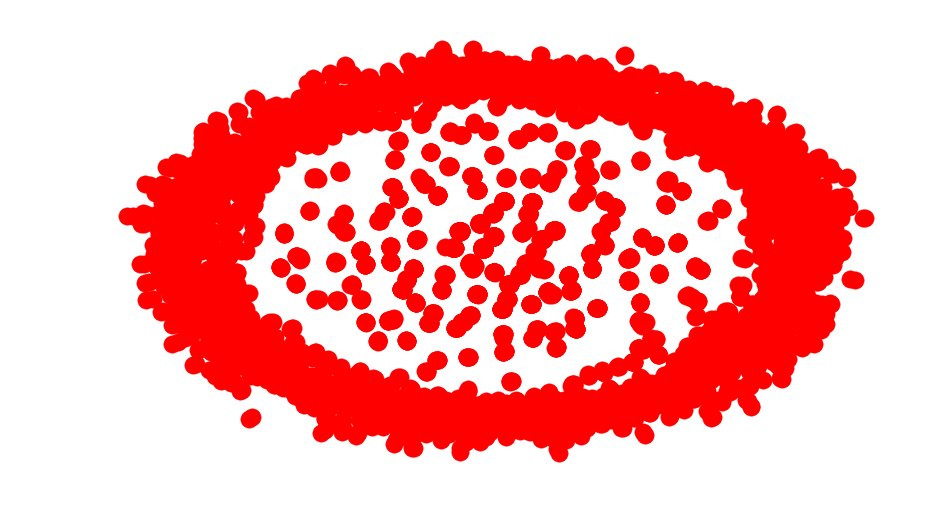

In [53]:
plt.figure(figsize=(16,9))
nx.draw_networkx(graph, with_labels=False)
plt.axis('off')

In [21]:
p_graph = nx.Graph()

for uri, attributes in songs.items():
    if attributes is None or not 'producer' in attributes:
        continue
        
    if len(attributes['producer']) <= 1:
        continue
        
    for src, dst in combinations(attributes['producer'], 2):
        p_graph.add_edge(src, dst)
        
p_graph.number_of_nodes(), p_graph.number_of_edges()

(6056, 9437)

(-1.1933479353785514,
 1.1910588189959526,
 -1.1986911684274673,
 1.2089254051446914)

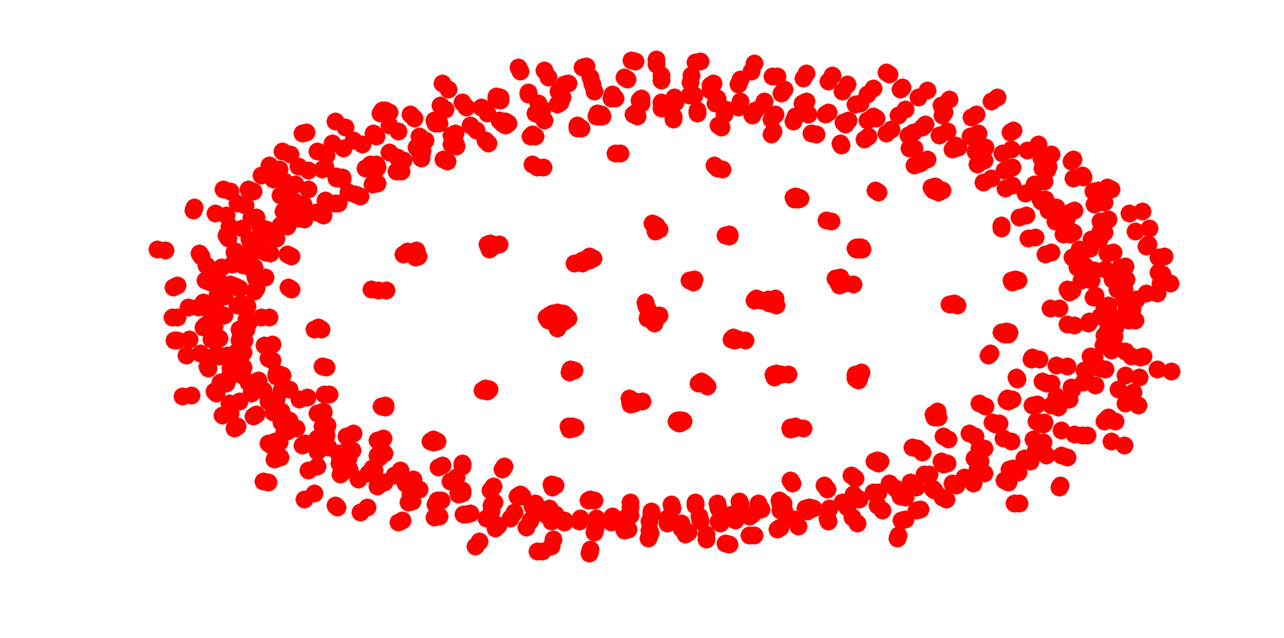

In [62]:
plt.figure(figsize=(22,11))
nx.draw_networkx(p_graph, with_labels=False)
plt.axis('off')

In [78]:
sorted(nx.pagerank(p_graph).items(), key=lambda x: x[1], reverse=True)

[('Carey', 0.004842014873607092),
 ('Martin', 0.0023128940056523755),
 ('Michael Lloyd', 0.0018751614753604237),
 ('Tom Collins', 0.0018655865342949959),
 ('Steve Bogard', 0.0017894579271530663),
 ('Phil Wilde, AJ Duncan', 0.0017352573626351082),
 ('Ian Curnow', 0.0016633708340180464),
 ('Rami', 0.001638183934376374),
 ('Goar B', 0.0015978205406197272),
 ('Wilbur C. Rimes', 0.0015567681254919077),
 ('LDN Noise', 0.0015496057726829351),
 ('Carl Falk', 0.0015425036036355137),
 ('Kyoto', 0.0015425036036355133),
 ('Udo Niebergall', 0.0014206725251198252),
 ('Phil Wilde', 0.0014206725251198252),
 ('Steve Levine', 0.0014206725251198252),
 ('Martin Eyerer', 0.0014206725251198252),
 ('Martin Terefe', 0.0014206725251198252),
 ('Pascal Gabriel', 0.0014206725251198252),
 ('Mauri Stern', 0.0014206725251198252),
 ('Stewart Magee', 0.0014206725251198252),
 ('Dave Roth, David Jost, Peter Hoffmann, Patrick Benzner',
  0.0014206725251198252),
 ('Bob Rock', 0.0014206725251198252),
 ('Divin, Louis Côté',

In [77]:
sorted(nx.betweenness_centrality(p_graph).items(), key=lambda x: x[1], reverse=True)

[('Carey', 0.00016009407165099119),
 ('Hudson', 2.434178867208053e-05),
 ('Rob Kean', 2.2469343389612797e-05),
 ('Ian Curnow', 2.1533120748378932e-05),
 ('Rami', 1.872445282467733e-05),
 ('Martin', 1.6852007542209598e-05),
 ('Goar B', 1.4979562259741865e-05),
 ('Richard Stannard', 1.3107116977274132e-05),
 ('Steve Bogard', 1.3107116977274132e-05),
 ('Ian Curnow, Phil Harding', 1.3107116977274132e-05),
 ('Wilbur C. Rimes', 1.1234671694806398e-05),
 ('Kristian Lundin', 1.1234671694806398e-05),
 ('Max Martin', 1.1234671694806398e-05),
 ('LDN Noise', 1.1234671694806398e-05),
 ('Phil Wilde, AJ Duncan', 9.362226412338665e-06),
 ('Tom Collins', 9.362226412338665e-06),
 ('Axel Breitung', 9.362226412338665e-06),
 ('Phil Harding', 8.426003771104799e-06),
 ('Carl Falk', 7.489781129870932e-06),
 ('Chuck Howard', 7.489781129870932e-06),
 ('Kyoto', 7.489781129870932e-06),
 ('Michael Lloyd', 5.617335847403199e-06),
 ('Michael Baker', 5.617335847403199e-06),
 ('Niclas Kings, Niklas Bergwall', 5.617335

In [79]:
sorted(nx.closeness_centrality(p_graph).items(), key=lambda x: x[1], reverse=True)

[('Carey', 0.012637008381689234),
 ('Dupri', 0.0072905817586668645),
 ('Hudson', 0.0072905817586668645),
 ('Seal', 0.0070205602120495736),
 ('Cox', 0.0070205602120495736),
 ('Stewart', 0.0070205602120495736),
 ('Nash', 0.0070205602120495736),
 ('Jackson', 0.0070205602120495736),
 ('Severin', 0.0070205602120495736),
 ('Afanasieff', 0.006769825918762089),
 ('Mike Connell', 0.006769825918762089),
 ('David Connell', 0.006769825918762089),
 ('Lou Giordano', 0.006769825918762089),
 ('Tim Harper', 0.006769825918762089),
 ('George Huntley', 0.006769825918762089),
 ('Doug MacMillan', 0.006769825918762089),
 ('Steve Potak', 0.006769825918762089),
 ('Peele Wimberley', 0.006769825918762089),
 ('Poyser', 0.006769825918762089),
 ('Shaiman', 0.006769825918762089),
 ('Darkchild', 0.006769825918762089),
 ('Jerkins', 0.006769825918762089),
 ('Klaus Biedermann', 0.005802707930367505),
 ('Jim Binapfl', 0.005802707930367505),
 ('Jake Buck', 0.005802707930367505),
 ('Mark Duran', 0.005802707930367505),
 ('J

In [23]:
connected_producers = max(nx.connected_components(p_graph), key=len)

In [24]:
len(connected_producers)

3779

In [25]:
c_graph = nx.subgraph(p_graph, connected_producers)

(-0.81090091615915294,
 0.82803874164819713,
 -1.194048739671707,
 1.2084842693805693)

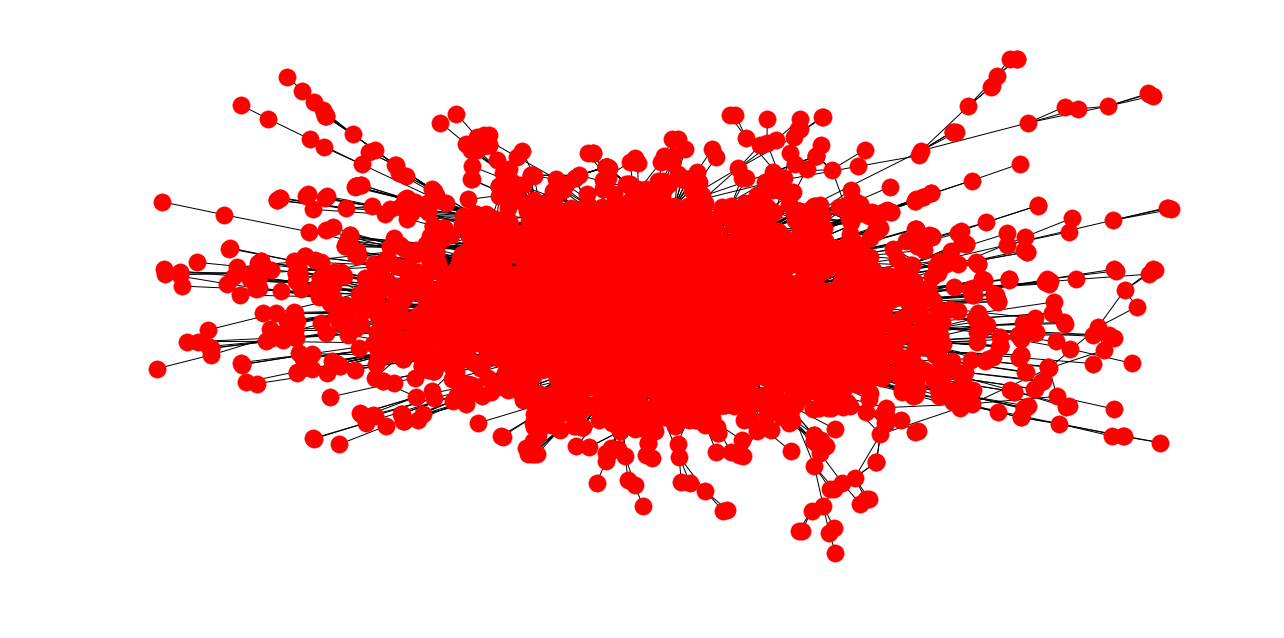

In [26]:
plt.figure(figsize=(22,11))
nx.draw_networkx(c_graph, with_labels=False)
plt.axis('off')

In [32]:
sorted(nx.pagerank(c_graph).items(), key=lambda x: x[1], reverse=True)[0:10]

[('*', 0.05521260801741201),
 ('http://dbpedia.org/resource/George_Martin', 0.0029950419529511003),
 ('http://dbpedia.org/resource/Dann_Huff', 0.002793828640233245),
 ('http://dbpedia.org/resource/David_Foster', 0.002259932397392143),
 ('http://dbpedia.org/resource/Byron_Gallimore', 0.002254790418232041),
 ('http://dbpedia.org/resource/Rick_Rubin', 0.002233801124449703),
 ('http://dbpedia.org/resource/Mark_Wright_(record_producer)',
  0.002169768296651277),
 ('http://dbpedia.org/resource/Tony_Brown_(record_producer)',
  0.002066962958044508),
 ('http://dbpedia.org/resource/Steve_Mac', 0.0020356062572158347),
 ('http://dbpedia.org/resource/Jimmy_Bowen', 0.0019732995510705034)]

In [33]:
sorted(nx.betweenness_centrality(c_graph).items(), key=lambda x: x[1], reverse=True)[0:10]

[('*', 0.8827939341865871),
 ('http://dbpedia.org/resource/George_Martin', 0.05102242331502686),
 ('http://dbpedia.org/resource/Tony_Brown_(record_producer)',
  0.031111351318825097),
 ('http://dbpedia.org/resource/David_Foster', 0.031004411253036684),
 ('http://dbpedia.org/resource/Scott_Hendricks', 0.026631021866252463),
 ('http://dbpedia.org/resource/James_Stroud', 0.024424192813506388),
 ('http://dbpedia.org/resource/Rick_Rubin', 0.024317162410036085),
 ('http://dbpedia.org/resource/Steve_Mac', 0.02278363805678748),
 ('http://dbpedia.org/resource/Dann_Huff', 0.022332231396613163),
 ('http://dbpedia.org/resource/Byron_Gallimore', 0.02102238635868218)]

In [27]:
nx.write_graphml(c_graph, 'results/producers.graphml')